In [4]:
import pandas as pd 

In [8]:
import pandas as pd
from IPython.display import display

# Total row data per season
totals_data = {
    "Season": ["2021-2022", "2022-2023", "2023-2024", "2024-2025 (incomplete)"],
    "Matches (MP)": [54, 63, 48, 46],
    "Goals (G)": [6, 6, 7, 7],
    "Assists (A)": [14, 43, 37, 31],
    "Crosses (C)": [17, 26, 18, 18],
    "Clean Sheets (CS)": [4, 11, 10, 6],
    "Minutes (Min)": [4328, 4731, 3994, 3894]
}

df_totals = pd.DataFrame(totals_data)

# Nicely display the DataFrame
display(df_totals)


,Season,Matches (MP),Goals (G),Assists (A),Crosses (C),Clean Sheets (CS),Minutes (Min)
0,2021-2022,54,6,14,17,4,4328
1,2022-2023,63,6,43,26,11,4731
2,2023-2024,48,7,37,18,10,3994
3,2024-2025 (incomplete),46,7,31,18,6,3894


In [9]:
# التحليل الإحصائي للمواسم

In [10]:
# إضافة أعمدة التحليل الإحصائي
df_totals["Goals per Match"] = df_totals["Goals (G)"] / df_totals["Matches (MP)"]
df_totals["Assists per Match"] = df_totals["Assists (A)"] / df_totals["Matches (MP)"]
df_totals["Goal Involvement per Match"] = (df_totals["Goals (G)"] + df_totals["Assists (A)"]) / df_totals["Matches (MP)"]
df_totals["Minutes per Goal"] = df_totals["Minutes (Min)"] / df_totals["Goals (G)"]
df_totals["Minutes per Goal Contribution"] = df_totals["Minutes (Min)"] / (df_totals["Goals (G)"] + df_totals["Assists (A)"])

# عرض النتائج
display(df_totals)


,Season,Matches (MP),Goals (G),Assists (A),Crosses (C),Clean Sheets (CS),Minutes (Min),Goals per Match,Assists per Match,Goal Involvement per Match,Minutes per Goal,Minutes per Goal Contribution
0,2021-2022,54,6,14,17,4,4328,0.111111,0.259259,0.370370,721.333333,216.400000
1,2022-2023,63,6,43,26,11,4731,0.095238,0.682540,0.777778,788.500000,96.551020
2,2023-2024,48,7,37,18,10,3994,0.145833,0.770833,0.916667,570.571429,90.772727
3,2024-2025 (incomplete),46,7,31,18,6,3894,0.152174,0.673913,0.826087,556.285714,102.473684


In [11]:
# التصور البياني لأداء الاعب

In [13]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


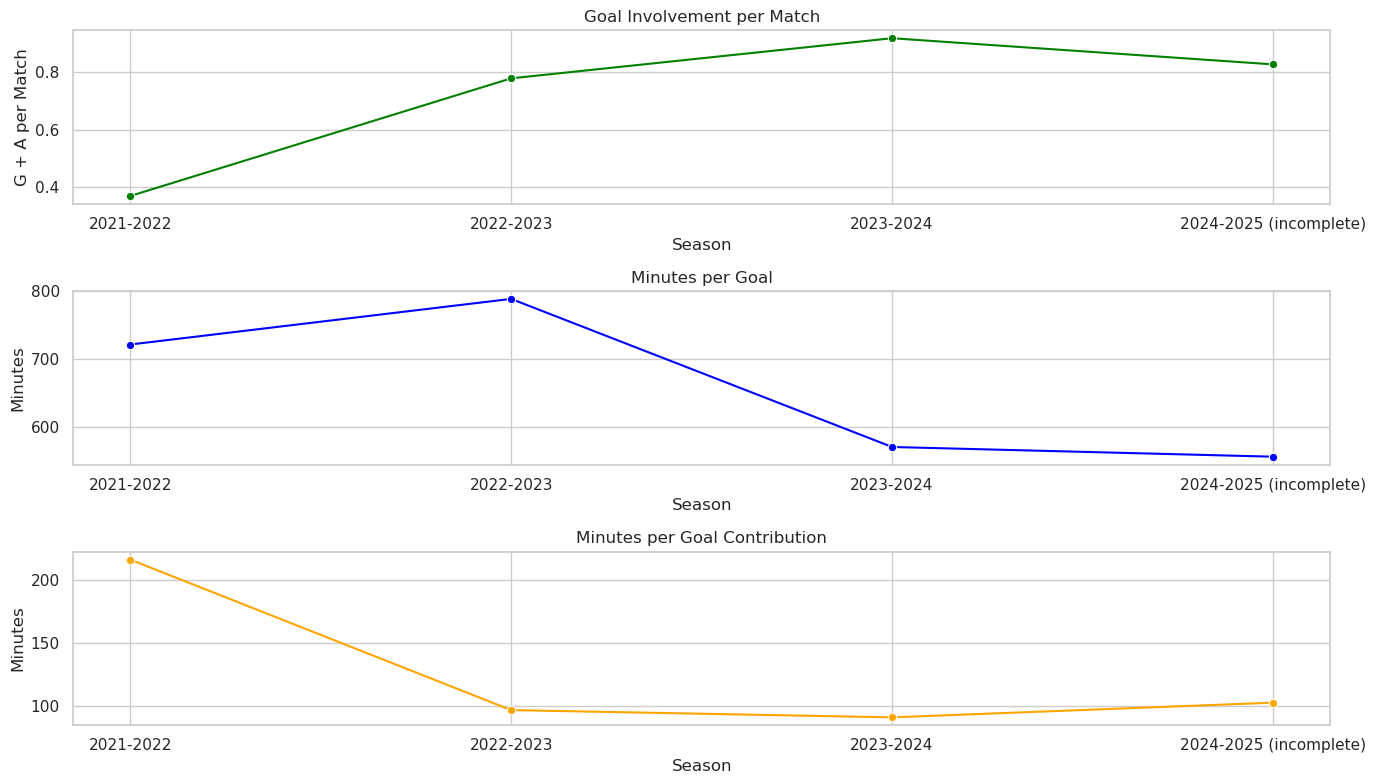

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# إعداد الرسم
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# رسم "Goal Involvement per Match"
plt.subplot(3, 1, 1)
sns.lineplot(data=df_totals, x="Season", y="Goal Involvement per Match", marker="o", color="green")
plt.title("Goal Involvement per Match")
plt.ylabel("G + A per Match")

# رسم "Minutes per Goal"
plt.subplot(3, 1, 2)
sns.lineplot(data=df_totals, x="Season", y="Minutes per Goal", marker="o", color="blue")
plt.title("Minutes per Goal")
plt.ylabel("Minutes")

# رسم "Minutes per Goal Contribution"
plt.subplot(3, 1, 3)
sns.lineplot(data=df_totals, x="Season", y="Minutes per Goal Contribution", marker="o", color="orange")
plt.title("Minutes per Goal Contribution")
plt.ylabel("Minutes")
plt.xlabel("Season")

plt.tight_layout()
plt.show()


In [15]:
# عرض عدد الأهداف في كل موسم
print(df_totals[["Season", "Goals (G)"]])


                   Season  Goals (G)
0               2021-2022          6
1               2022-2023          6
2               2023-2024          7
3  2024-2025 (incomplete)          7


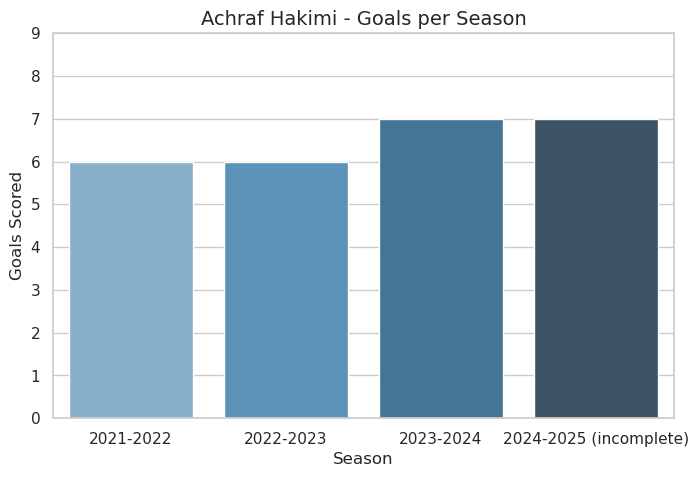

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=df_totals, x="Season", y="Goals (G)", palette="Blues_d")

plt.title("Achraf Hakimi - Goals per Season", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Goals Scored")
plt.ylim(0, df_totals["Goals (G)"].max() + 2)

plt.show()


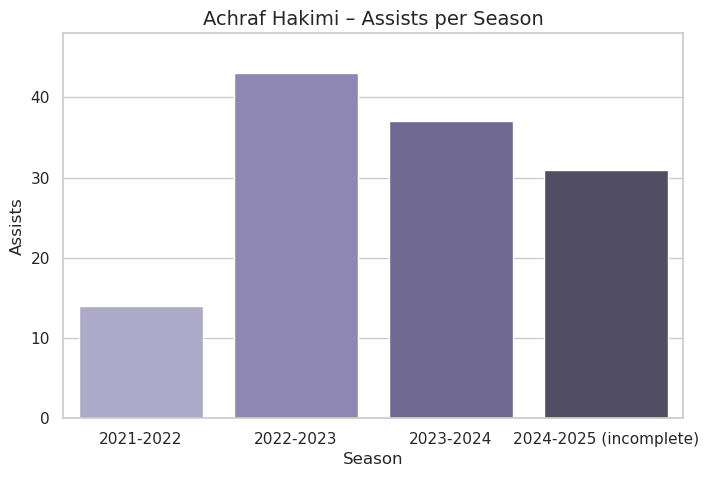

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# التمريرات الحاسمة لكل موسم
plt.figure(figsize=(8, 5))
sns.barplot(data=df_totals, x="Season", y="Assists (A)", palette="Purples_d")

plt.title("Achraf Hakimi – Assists per Season", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Assists")
plt.ylim(0, df_totals["Assists (A)"].max() + 5)

plt.show()


<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

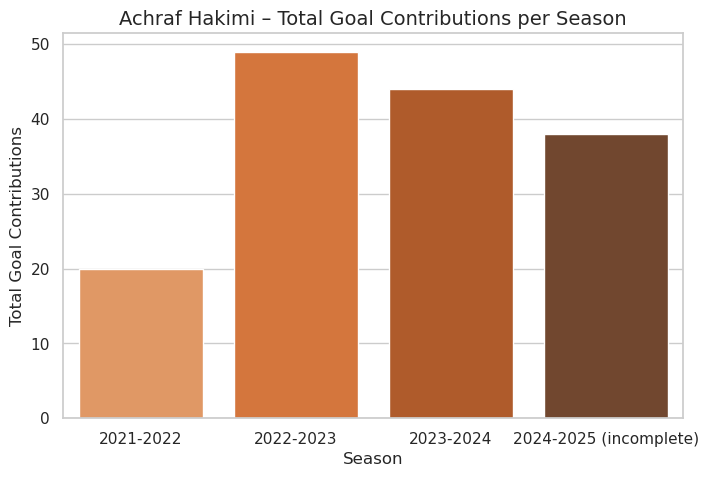

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# إنشاء عمود جديد للمساهمات التهديفية إن لم يكن موجوداً
df_totals["Total Goal Contributions"] = df_totals["Goals (G)"] + df_totals["Assists (A)"]

# رسم المبيان
plt.figure(figsize=(8, 5))
sns.barplot(data=df_totals, x="Season", y="Total Goal Contributions", palette="Oranges_d")

plt.title("Achraf Hakimi – Total Goal Contributions per Season", fontsize=14)
plt.xlabel


Text(0, 0.5, 'Minutes Played')

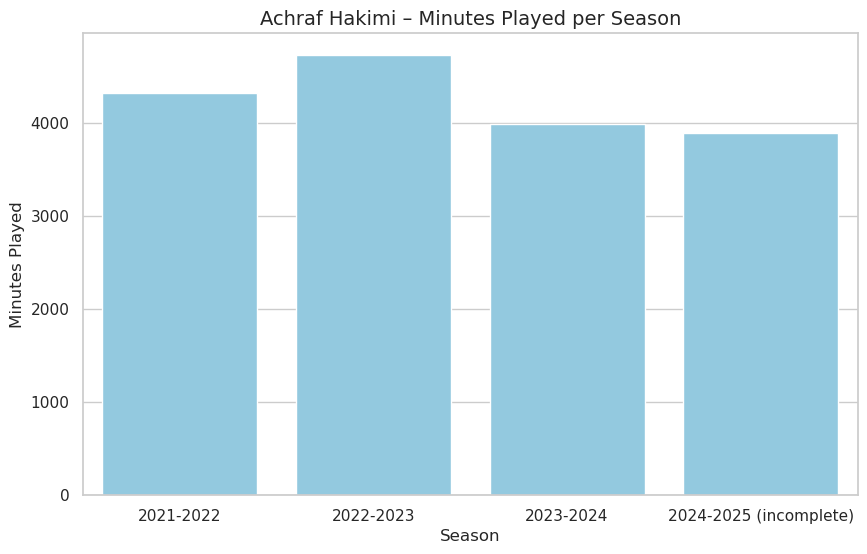

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# تحويل العمود إلى نوع رقمي في حال كان على شكل نص
df_totals['Minutes (Min)'] = pd.to_numeric(df_totals['Minutes (Min)'], errors='coerce')

# رسم المبيان
plt.figure(figsize=(10, 6))
sns.barplot(data=df_totals, x="Season", y="Minutes (Min)", color="skyblue")

plt.title("Achraf Hakimi – Minutes Played per Season", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Minutes Played")
